### Dataset

#### Import

In [70]:
import pandas as pd
import numpy as np 
from keras.preprocessing.sequence import pad_sequences

In [71]:
data_loader = mpy.loadmat("Degradation_Prediction_Dataset_ISEA.mat")

data = pd.DataFrame.from_dict(data_loader["TDS"])

data.head()

,Cell,Sample,History_Cycle,History,Target_Cycle_Expanded,Target_expanded,Target_Cycle,Target
0,1,1,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[105, 110, 115, 120, 125, 130, 135, 140, 145, ...","[1.7973466099593307, 1.7957194104838883, 1.794...","[105, 150, 195, 240, 285, 330, 375, 420, 465, ...","[1.7973466099593307, 1.7832393947563925, 1.770..."
1,1,2,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[110, 115, 120, 125, 130, 135, 140, 145, 150, ...","[1.7957194104838883, 1.794106179214274, 1.7925...","[110, 155, 200, 245, 290, 335, 380, 425, 470, ...","[1.7957194104838883, 1.7817527911332156, 1.769..."
2,1,3,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[115, 120, 125, 130, 135, 140, 145, 150, 155, ...","[1.794106179214274, 1.7925073295393719, 1.7909...","[115, 160, 205, 250, 295, 340, 385, 430, 475, ...","[1.794106179214274, 1.7802836132202329, 1.7676..."
3,1,4,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[120, 125, 130, 135, 140, 145, 150, 155, 160, ...","[1.7925073295393719, 1.7909232748480652, 1.789...","[120, 165, 210, 255, 300, 345, 390, 435, 480, ...","[1.7925073295393719, 1.7788295719024707, 1.766..."
4,1,5,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...","[1.834012342776987, 1.8321873038112761, 1.8303...","[125, 130, 135, 140, 145, 150, 155, 160, 165, ...","[1.7909232748480652, 1.7893544285292378, 1.787...","[125, 170, 215, 260, 305, 350, 395, 440, 485, ...","[1.7909232748480652, 1.7773897124807985, 1.765..."


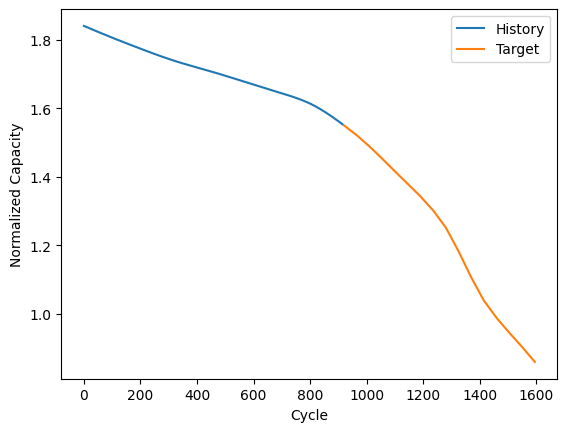

In [72]:
import matplotlib.pyplot as plt

# Plot History and Target for a single sample
sample_idx = 8002
plt.plot(data['History_Cycle'][sample_idx], data['History'][sample_idx], label='History')
plt.plot(data['Target_Cycle'][sample_idx], data['Target'][sample_idx], label='Target')
plt.xlabel('Cycle')
plt.ylabel('Normalized Capacity')
plt.legend()
plt.show()

In [89]:
# Fint the maximum length of the history and target sequences
max_history_length = data['History_Cycle'].apply(len).max()
max_target_length = data['Target_Cycle'].apply(len).max()

print(f'Maximum history length: {max_history_length}')
print(f'Maximum target length: {max_target_length}')

Maximum history length: 288
Maximum target length: 39


In [93]:
# Padding the sequences in 'History' and 'Target'
data['Padded_History'] = pad_sequences(data['History'], padding='pre', dtype='float32').tolist()
data['Padded_Target'] = pad_sequences(data['Target'], padding='post', dtype='float32').tolist()

In [97]:
# Initialize a list to store the processed data
processed_data = []

# Iterate over the DataFrame rows
for _, row in data.iterrows():
    # Create a dictionary for each entry
    processed_entry = {
        'Cell': row['Cell'],                     # Cell ID
        'Sample': row['Sample'],                 # Sample number
        'History_Cycle': row['History_Cycle'],   # Capacity history cycle numbers
        'Target_Cycle': row['Target_Cycle'],     # Target cycle numbers
        'Padded_History': row['Padded_History'], # Use padded history
        'Padded_Target': row['Padded_Target']    # Use padded target
    }
    # Append the processed entry to the list
    processed_data.append(processed_entry)

# Convert the list of dictionaries into a DataFrame
import pandas as pd
processed_df = pd.DataFrame(processed_data)

print(processed_df)

       Cell  Sample                                      History_Cycle  \
0         1       1  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   
1         1       2  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   
2         1       3  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   
3         1       4  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   
4         1       5  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   
...     ...     ...                                                ...   
10681    47   10682  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   
10682    47   10683  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   
10683    47   10684  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   
10684    47   10685  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   
10685    47   10686  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,...   

                                            Target_Cycle  \
0      [105, 150, 195, 240, 285, 330, 375, 420, 465

In [95]:
def generate_dataset(data, shuffle=False):
    number_of_rows = len(data)                                  # number of rows of the data frame
    number_of_samples = 0                                       # variable for number of samples in each input row
    number_of_targets = 0                                       # variable for number of samples in each target row
    inputlist = []                                              # initiate input array as list
    targetlist = []                                             # initiate target array as list

    # Extract each row from the data frame
    for row in range(number_of_rows):
        input_row = data.iloc[row, -2]                          # extract capacity history as input
        number_of_samples = len(input_row)                      # number of samples in the current input row
        current_input_row = np.zeros((number_of_samples, 1))    # initiate current input row as numpy array
        for sample in range(number_of_samples):
            # populate current row with sample values from capacity history
            current_input_row[sample, 0] = input_row[sample]
        inputlist.append(current_input_row)                     # append current row to input list

        target_row = data.iloc[row, -1]                         # extract future capacity degradation curve as output
        number_of_targets = len(target_row)
        targetlist.append(target_row)                           # append current target row to target list

    # convert input and target lists to numpy arrays and assert proper dimensions
    input_array = np.asarray(inputlist).reshape((number_of_rows, number_of_samples, 1))
    target_array = np.asarray(targetlist).reshape((number_of_rows, number_of_targets, 1))

    if shuffle:
        # shuffle input and target arrays in tandem if shuffle = true in function parameters
        features_file, labels_file = array_shuffler(input_array, target_array)
        print('Shuffled set', end=' - ')
    else:
        # If shuffle = false, then just pass the original arrays
        print('Non Shuffled set', end=' - ')
        features_file, labels_file = input_array, target_array

    print(features_file.shape, labels_file.shape)             # confirm proper dimensions of the input and target files
    return features_file, labels_file

In [96]:
features_file, labels_file = generate_dataset(processed_df)

Non Shuffled set - (10686, 288, 1) (10686, 39, 1)
